# AluraCare

In [1]:
import pandas as pd

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

In [3]:
resultados_exames = pd.read_csv(uri)

In [4]:
resultados_exames.sample(5)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
309,893548,B,13.05,13.84,82.71,103.78,530.6,0.08352,0.03735,0.004559,...,93.96,672.4,0.1016,0.05847,0.01824,0.786,0.03532,0.2107,0.06580,NaN
106,863031,B,11.64,18.33,75.17,103.78,412.5,0.11420,0.10170,0.070700,...,85.51,521.7,0.1688,0.26600,0.28730,0.786,0.12180,0.2806,0.09097,NaN
177,87281702,M,16.46,20.11,109.30,103.78,832.9,0.09831,0.15560,0.179300,...,123.50,981.2,0.1415,0.46670,0.58620,0.786,0.20350,0.3054,0.09519,0.855873
195,875878,B,12.91,16.33,82.53,103.78,516.4,0.07941,0.05366,0.038730,...,90.81,600.6,0.1097,0.15060,0.17640,0.786,0.08235,0.3024,0.06949,NaN
310,893783,B,11.70,19.11,74.33,103.78,418.7,0.08814,0.05253,0.015830,...,80.92,483.1,0.1223,0.10870,0.07915,0.786,0.05741,0.3487,0.06958,NaN


In [5]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [6]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [7]:
419/569  # % de valores nulos da coluna exame_33

0.7363796133567663

In [61]:
type(diagnostico)

pandas.core.series.Series

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED =  123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns='exame_33')  # removendo coluna com valores nulos


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)

classificador.fit(treino_x, treino_y)

print(f'Acurácia: {classificador.score(teste_x, teste_y) * 100 :.2f}%')

Acurácia: 92.40%


In [9]:
from sklearn.dummy import DummyClassifier

SEED =  123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)


print(f'Acurácia do dummy: {classificador_bobo.score(teste_x, teste_y) * 100 :.2f}%')

Acurácia do dummy: 66.67%


## Construindo uma visualização

### Funçao melt

Pandas melt() function is used to change the DataFrame format from wide to long. It's used to create a specific format of the DataFrame object where one or more columns work as identifiers. All the remaining columns are treated as values and unpivoted to the row axis and only two columns – variable and value.

In [10]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis=1)  # todas as linhas, mas as variaveis apenas do 0 ao 10

dados_plot = pd.melt(dados_plot, 
                     id_vars='diagnostico', 
                     var_name='exames', 
                     value_name='valores')

dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

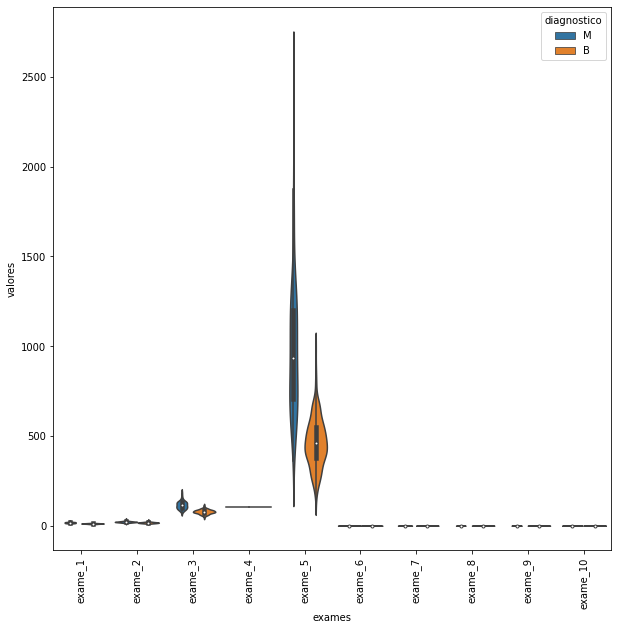

In [12]:
plt.figure(figsize=(10, 10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot)

plt.xticks(rotation=90)

## Padronizando os dados com o sklearn StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

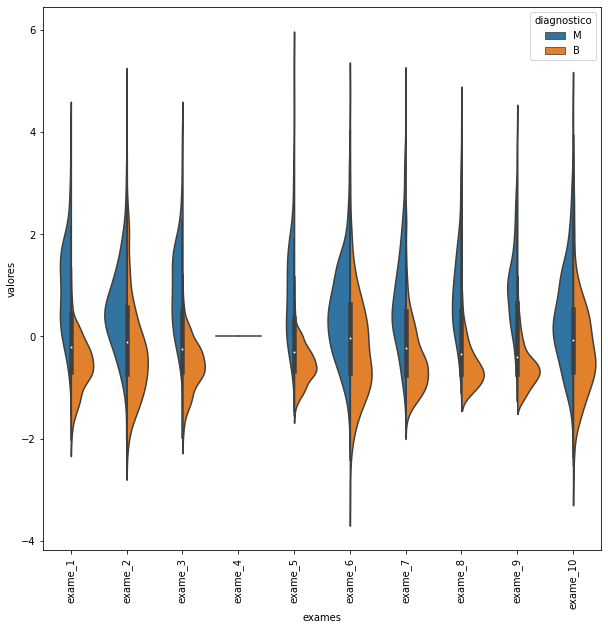

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2,
                                 columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis=1)

dados_plot = pd.melt(dados_plot, 
                     id_vars='diagnostico', 
                     var_name='exames', 
                     value_name='valores')

plt.figure(figsize=(10, 10))

sns.violinplot(x='exames', 
               y='valores', 
               hue='diagnostico', 
               data=dados_plot,
               split=True)

plt.xticks(rotation=90)

Agora que geramos nosso gráfico, começaremos a analisá-lo. No eixo "x" temos os exames, no "y" os valores normalizados, e no corpo do gráfico temos o violin plot. Mas como interpretar essas informações? Como as legendas apontam, do lado esquerdo, em azul, temos os cânceres do tipo maligno, e do lado direito, em laranja, os do tipo benigno. A parte mais alta da curva são os valores que mais ocorrem para cada tipo.

Quando analisamos especificamente o "exame_2", percebemos que o ponto mais alto da curva laranja está relativamente distante do ponto mais alto da curva azul. Isso significa que esse é um bom exame para diferenciar entre malignos e benignos, diferentemente do "exame_6", no qual os pontos mais altos de cada curva são bastante próximos, ainda que a curva laranja tenha uma forma um pouco menos ondulada.

No "exame_5", temos uma curva laranja bem acentuada, enquanto a curva azul está mais nivelada e distribuída. Temos também o "exame_4", que é o que mais chama atenção, já que é a única reta no nosso gráfico! Mas por que isso acontece? Se exibirmos os valores dessa coluna com valores_exames_v2.exame_4, perceberemos que todos os resultados são 1.0. Se ao invés disso utilizarmos valores_exames_v1.exame_4, veremos que essa coluna recebe um valor constante 103.78. Mas o que valores constantes agregam ao nosso conjunto?

In [15]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

Voltando ao nosso conjunto de dados, agora sabemos que podemos eliminar features como "exame_4", já que temos um valor constante. Antes de avançar nisso, precisamos plotar todas as features para sabermos quais deverão ser excluídas. Para facilitarmos nosso trabalho, criaremos uma função baseada no código que escrevemos.

Função para plotar os graficos:

In [16]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis=1)

  dados_plot = pd.melt(dados_plot, 
                    id_vars='diagnostico', 
                    var_name='exames', 
                    value_name='valores')

  plt.figure(figsize=(10, 10))

  sns.violinplot(x='exames', 
              y='valores', 
              hue='diagnostico', 
              data=dados_plot,
              split=True)

  plt.xticks(rotation=90)

Como já tínhamos do 1 ao 10, aqui plotamos do 10 ao 21:

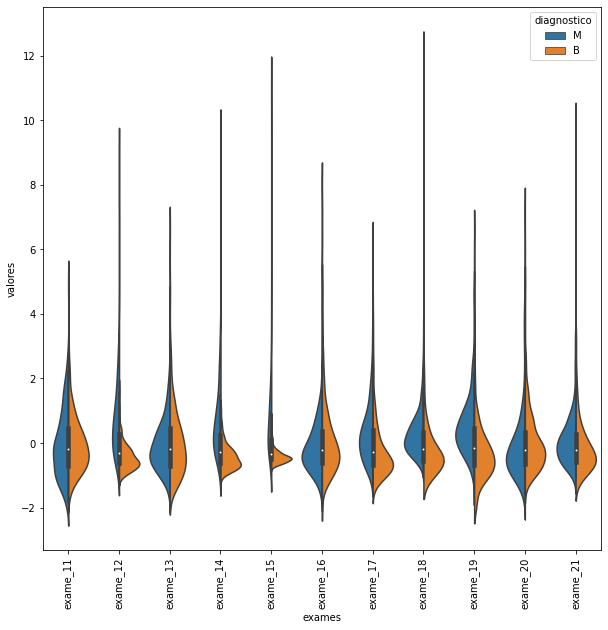

In [17]:
grafico_violino(valores_exames_v2, 10, 21)

E aqui do 21 ao 32:

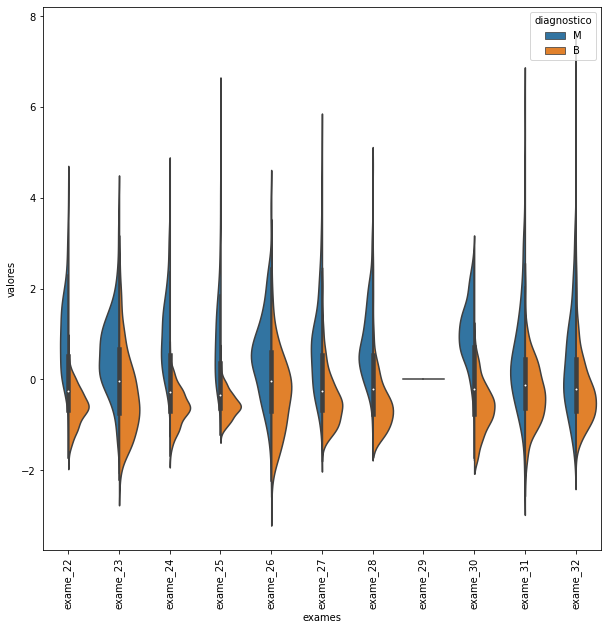

In [18]:
grafico_violino(valores_exames_v2, 21, 32)

Dropando as colunas com valores constantes:

In [19]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

In [20]:
def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                          diagnostico,
                                                          test_size=0.3)

  classificador = RandomForestClassifier(n_estimators=100)

  classificador.fit(treino_x, treino_y)

  print(f'Acurácia: {classificador.score(teste_x, teste_y) * 100 :.2f}%')

In [21]:
classificar(valores_exames_v3)

Acurácia: 92.40%


Como resultado, teremos 92.40% - ou seja, com a remoção das constantes (a redução de 2 dimensões), tivemos um pequeno aumento na acurácia do nosso classificador em relação à baseline que definimos anteriormente.

Menos dimensões, mais eficiente é o modelo.

## Matriz de Correlação

In [22]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Heatmap e correlação de variaveis

O próximo objetivo é calcularmos a correlação a partir do nosso dataframe valores_exames_v3, o que é possível com a função corr() do Pandas, que nos retornará justamente a matriz de correlação (a correlação entre todas as variáveis).

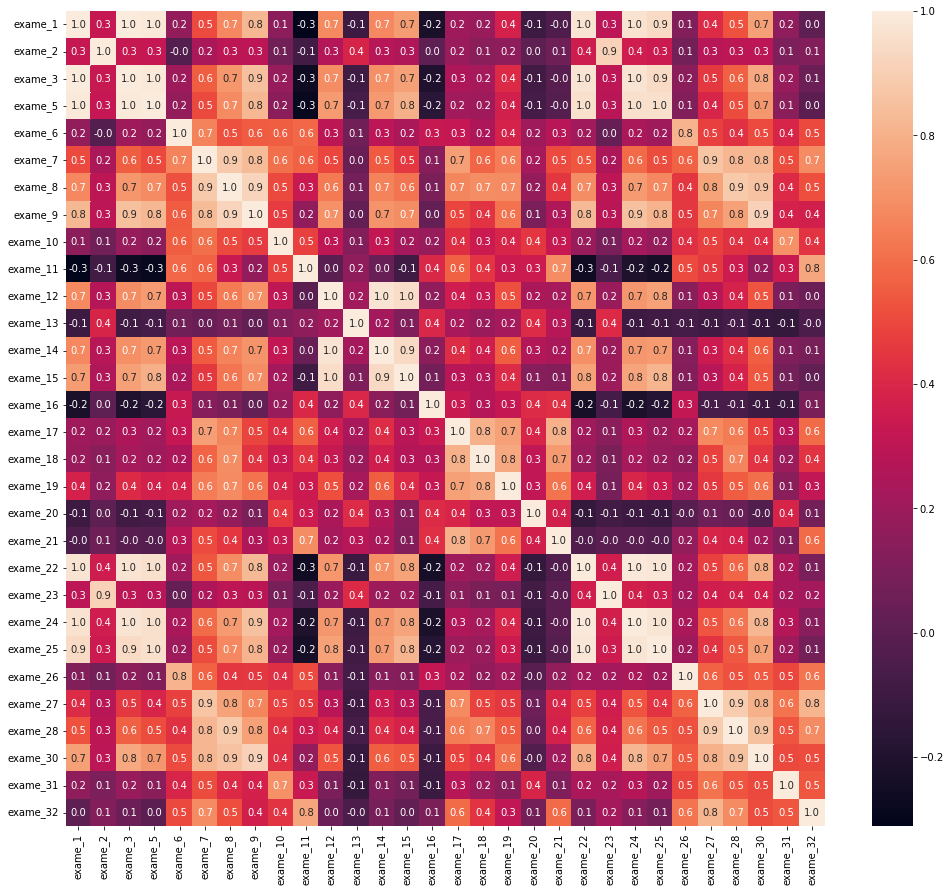

In [23]:
matriz_de_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17, 15))

sns.heatmap(matriz_de_correlacao,
            annot=True,  # para mostrar os valores dentro das caixinhas
            fmt='.1f')  # para mostrar apenas 1 casa decimal

é possível encontrar diversas features totalmente correlacionadas, com valores iguais a 1.0, e outras com um valor bem próximo, como 0.9. Enquanto isso, também temos features pouquíssimo correlacionadas, com valores próximos a 0.0. Por enquanto trabalharemos na remoção das features altamente correlacionadas.

Criaremos então uma matriz_correlacao_v1 que armazenará o retorno de todos as correlações superiores a 0.99. ou seja, que possuem uma correlação quase perfeita.

In [24]:
matriz_de_correlacao_v1 = matriz_de_correlacao[matriz_de_correlacao > 0.99]
matriz_de_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Assim, teremos uma matriz contendo somente os valores maiores que 0.99, enquanto todos os outros são representados por NaN. Da mesma forma que quando excluímos os valores vazios do conjunto de dados, podemos fazer uma soma desses valores e criar uma nova variávei variaveis_correlacionadas que armazenará os retornos maiores do que 1.0.

In [25]:
matriz_de_correlacao_v2 = matriz_de_correlacao_v1.sum()
variaveis_correlacionadas = matriz_de_correlacao_v2[matriz_de_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Feito isso, criaremos uma variável valores_exames_v4 que receberá o dataframe valores_exames_v3 após a remoção das colunas listadas em variaveis_correlacionadas.

In [26]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Mediremos então a acurácia desse novo dataframe com a função classificar():

In [27]:
classificar(valores_exames_v4)

Acurácia: 92.40%


Obtivemos um resultado um pouco pior (na aula o resultado foi 91.81%. No meu caso eu poderia ter removido todas as 4 variaveis. Mas resolvi tocar como na aula e remover 2) do que aquele que vínhamos obtendo, mas por que? Nós descobrimos quais variáveis estavam correlacionadas e excluímos todas elas, mas na verdade não era isso que deveríamos ter feito. Voltando a analisar nossa matriz de correlação, podemos perceber que as features "exame_1" e "exame_3" estão totalmente correlacionadas, da mesma forma que "exame_22" e "exame_24". Sendo assim, removeremos apenas uma feature de cada um desses pares - no caso, "exame_3" e "exame_24", e criaremos um novo dataframe valores_exames_v5 sem elas. Então, mediremos novamente a acurácia do nosso classificador.

In [28]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
classificar(valores_exames_v5)

Acurácia: 92.40%


Assim, conseguimos excluir mais duas features sem prejudicarmos nossos resultados (aula=92.98%), o que é muito interessante. Até o momento, as técnicas aplicadas aqui podem ser aplicadas para qualquer base dados, pois elas têm um caráter de pré-processamento: verificamos e excluímos os valores vazios, os constantes e os de alta correlação.

## Reduzindo drasticamente o numero de features com o SelectKBest

Agora que excluímos as features de alta correlação do nosso dataset, será que existe uma maneira de selecionarmos um determinado número ("k") de melhores features desse conjunto? A ideia seria gerarmos uma pontuação para cada feature (cada exame) e selecionar as melhores dentre elas.

O SKlearn possui um método SelectKBest() que faz justamente isso: a partir de uma função matemática, ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores.

In [29]:
from sklearn.feature_selection import SelectKBest

Na chamada, além de um número k de features, precisaremos passar a função matemática que deverá ser utilizada. Uma função muito utilizada é o Qui-quadrado, que usaremos para inferir quais features serão mais representativas para nosso processo de classificação.

In [30]:
from sklearn.feature_selection import chi2

No nosso caso, utilizaremos 5 como valor de k. Ou seja, de exames que eram realizados para chegar a um diagnóstico, queremos realizar apenas 5, mantendo a qualidade de predição do nosso algoritmo.

In [31]:
selecionar_kmelhores = SelectKBest(score_func=chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f4fcd275200>)

Agora precisamos treinar nosso modelo e realizar a transformação dos dados. Para isso, precisaremos separar novamente os dados de treino e de teste, o que dessa vez será feito com o conjunto valores_exames_v5. 

In [32]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, 
                                                        diagnostico,
                                                        test_size=0.3)
# selecionar_kmelhores.fit(treino_x, treino_y)    => vai dá erro

Entretanto, essa chamada incorrerá em um erro. Isso porque a função qui-quadrado não aceita valores negativos, e existem vários deles, por exemplo, na coluna "exame_5". Uma alternativa para corrigirmos isso seria voltarmos para os valores não-normalizados que tínhamos no conjunto valores_exames_v1. Para isso, faremos um drop() das colunas "exame_4", "exame_29", "exame_3" e "exame_24" de valores_exames_v1 e armazenaremos o retorno em uma variável valores_exames_v6.

In [33]:
valores_exames_v6 = valores_exames_v1.drop(['exame_4', 'exame_29', 'exame_3', 'exame_24'], axis=1)

Agora, com os dados originais e as colunas desnecessárias removidas, separamos novamente os dados de treino e de teste, o que dessa vez será feito com o conjunto valores_exames_v6:

In [34]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size=0.3)

Em seguida, separaremos novamente os dados de treino e chamaremos o fit() a partir de selecionar_kmelhores(), passando como parâmetros nossos dados de treino.

In [35]:
selecionar_kmelhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x7f4fcd275200>)

Depois disso, criaremos duas variáveis, treino_kbest e teste_kbest, cada uma delas recebendo o retorno de transform() sobre os dados de um dos conjuntos - treino_x e teste_x, respectivamente.

In [36]:
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

Agora, se chamarmos treino_kbest.shape, teremos um conjunto com apenas 5 colunas:

In [37]:
treino_kbest.shape

(398, 5)

O mesmo ocorre com teste_kbest.shape:

In [38]:
teste_kbest.shape

(171, 5)

O código inteiro do SelectKBest em um único bloco fica assim:

In [39]:
# Código completo do SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 1234
random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(['exame_4', 
                                            'exame_29', 
                                            'exame_3', 
                                            'exame_24'], 
                                           axis=1)

selecionar_kmelhores = SelectKBest(score_func=chi2, 
                                   k=5)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

print(treino_kbest.shape, teste_kbest.shape)

(398, 5) (171, 5)


O próximo procedimento será voltarmos à treinar nosso modelo RandomForest com apenas essas cinco features, realizarmos a classificação e obtermos a nova acurácia:

In [40]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(treino_kbest, treino_y)

print(f'Acurácia: {classificador.score(teste_kbest, teste_y) * 100 :.2f}%')

Acurácia: 92.40%


O último resultado que obtivemos antes desse tratamento foi de 92.98%, quando havíamos excluído apenas 4 features. Dessa vez, temos 92.40% utilizando apenas 5 features, uma redução de 85% do nosso conjunto de dados. Na realidade da Alura Care, supondo que cada exame tem o mesmo custo, tivemos uma redução de 85%! Isso parece um sucesso, não? Mas será que analisar somente a acurácia é o suficiente, ou seria mais interessante trabalharmos mais detalhadamente na análise dos nossos dados?

## Matriz de Confusão

Reduzindo o nosso banco de dados para apenas 5 exames, chegamos a uma acurácia de 92.40%, no limiar do nosso baseline. Porém, nos removemos um volume muito grande de informações, e não sabemos exatamente qual o impacto disso. Será que estamos acertando mais quando o câncer é do tipo benigno? Ou errando mais quando ele é do tipo maligno?

Podemos analisar isso por meio de uma matriz de confusão, representada no SKlearn pela função confusion_matrix(). Essa função nos retorna uma matriz na qual os elementos ***i*** são os valores reais e os elementos ***j*** são os valores de predição. Como parâmetros, ela recebe os valores reais (teste_y) e os valores preditos (y_pred).

No nosso projeto, importaremos a função confusion_matrix do módulo sklearn.metrics e criaremos uma variável matriz_confusao que guardará o retorno da sua chamada. O primeiro parâmetro que passaremos para essa função é o teste_y, que compõe os resultados reais. Também precisaremos passar as predições (y_pred), mas não as temos ainda, afinal estávamos calculando apenas a acurácia.

Para obtermos as predições (y_pred), chamaremos classificador.predict() com teste_kbest como parâmetro - afinal, treinamos esse classificador com os dados treino_kbest selecionados pelo modelo select_kbest().

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = classificador.predict(teste_kbest)

matriz_confusao = confusion_matrix(teste_y, y_pred)
matriz_confusao

array([[100,   5],
       [  8,  58]])

Conseguimos gerar a nossa matriz de confusão, mas ainda precisamos interpretá-la. Para isso, utilizaremos novamente o heatmap() do Seaborn, exibindo esses dados de maneira visual de modo a permitir uma análise mais aprofundada.

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

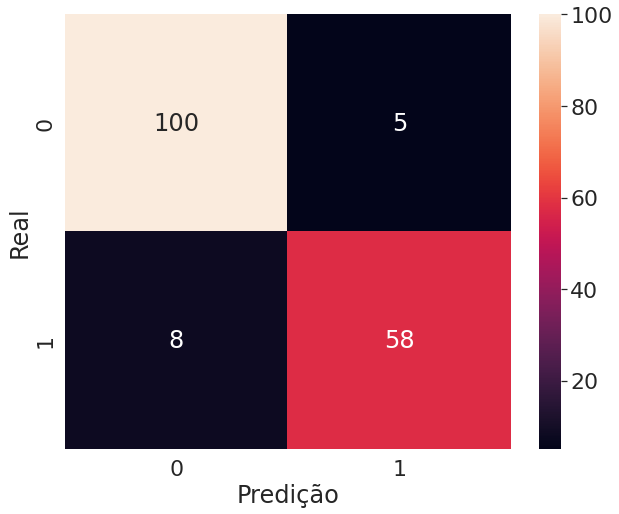

In [42]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")

Mas como interpretá-la? O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição. Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno. A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos. Mas por que essas informações são importantes?

Em alguns casos, como na área da saúde, é muito importante sabermos qual classificação estamos acertando mais. Imagine, por exemplo, uma pessoa que realmente tem câncer, mas recebe o diagnóstico de que não tem. Esse tipo de equívoco no diagnóstico tornaria o tratamento mais difícil, afinal o tempo de realização impacta nas chances de cura desse tipo de doença.

## Seleção com RFE

Aproveitando a ideia do SelectKBest(), que dá uma pontuação para cada feature,  aprenderemos uma nova técnica, esta relativamente semelhante ao SelectKBest().

Nessa nova técnica, por meio da acurácia, que será nossa forma de avaliação, nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia. 

Esse processo será feito sucessivamente até atingir o número de features selecionado - no no nosso caso, 5.

Esse modelo, que implementaremos em Python, é chamado de RFE - Recursive Feature Elimination, algo como "eliminacao recursiva de atributos".

No nosso notebook, importaremos o método RFE do módulo sklearn.feature_selection. Esse método tem como entrada o estimador (estimator),o número de features que queremos selecionar (n_features_to_select), o número de passos que ele dará (step) e um argumento verbose que não utilizaremos no momento.

Nosso estimador será o classificador (lá do randomForest), o número de features será 5 e queremos dar apenas 1 passo.

In [43]:
from sklearn.feature_selection import RFE

selecionador_rfe = RFE(estimator = classificador, 
                       n_features_to_select=5,
                       step=1)

Nosso classificador é o RandomForestClassifier(), mas ele está treinado com os dados gerados pelo SelectKBest. Sendo assim, teremos que recriá-lo, treinando-o com os dados treino_x e treino_y.

In [44]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = SEED)

classificador.fit(treino_x, treino_y)

RandomForestClassifier(random_state=1234)

Então, ajustaremos nosso selecionador_rfe aos mesmos dados treino_x e treino_y; transformaremos os dados de treino_x e os armazenaremos em uma variável treino_rfe; transformaremos os dados de teste_x e os armazenaremos em uma variável teste_rfe; e então ajustaremos o classificador com os dados treino_rfe e treino_y.

In [45]:
selecionador_rfe = RFE(estimator=classificador, 
                       n_features_to_select=5, 
                       step=1)

selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

print(f'Acurácia: {classificador.score(teste_rfe, teste_y) * 100 :.2f}%')

Acurácia: 90.06%


Perceba que o resultado com o RFE foi um pouco pior que os outros métodos que utilizamos anteriormente, que chegavam a 92.40%. Sendo assim, o SelectKBest aparenta ser um pouco melhor, pelo menos para esses dados.

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

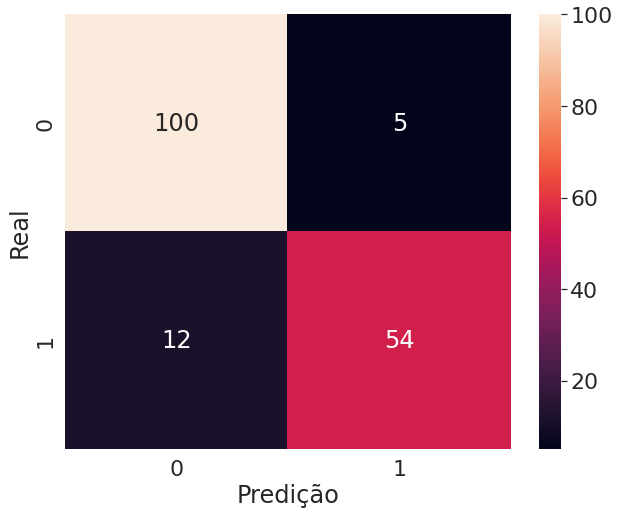

In [46]:
y_pred = classificador.predict(teste_rfe)

matriz_confusao = confusion_matrix(teste_y, y_pred)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")

Pelo mapa de calor, não temos nenhuma diferença nas previsões. Entretanto, O RFE acaba errando mais em relação ao diagnóstico de cânceres malignos.

Quais as diferenças entre os métodos automatizados (SelectKbest e REF) e as formas analíticas (Detecção de valores não preenchidos, valores constantes e correlacionados) utilizadas até o momento?

O método automatizado necessita do número de atributos que serão mantidos e depende de alguma forma de avaliação para cada atributo, por exemplo: o SelectKbest que utiliza uma função para gerar uma pontuação dos atributos (features), assim selecionando os K melhores. 

Métodos análiticos identificam certos aspectos nos dados como correlação entre os atributos, valores constantes e valores vazios, para então tratar manualmente os respectivos atributos.

Acurácia: 90.06%


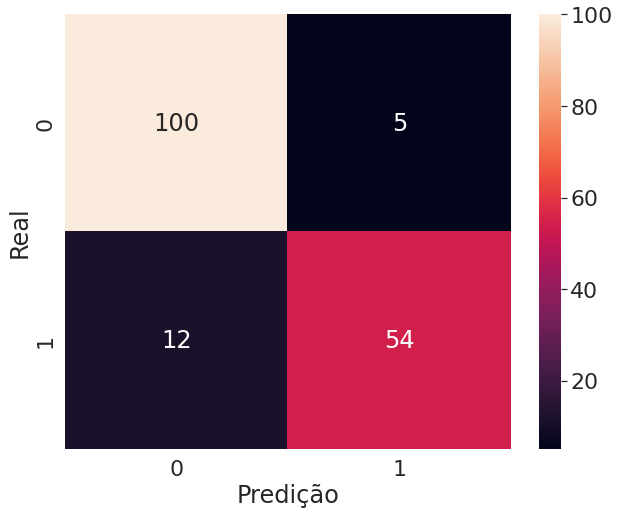

In [47]:
# Codigo completo do RFE
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = SEED)

classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, 
                       n_features_to_select=5, 
                       step=1)

selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

y_pred = classificador.predict(teste_rfe)
matriz_confusao = confusion_matrix(teste_y, y_pred)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")

print(f'Acurácia: {classificador.score(teste_rfe, teste_y) * 100 :.2f}%')

## Seleção com RFECV

Até o momento nós selecionamos algumas features com base em visualizações, como o Violin Plot e a Matriz de Correlação, e com alguns algoritmos mais automatizados, como o SelectKBest e o RFE. No caso desses algoritmos, nós determinamos quantas features gostaríamos que fossem selecionadas - no nosso caso 5, mas poderiam ser 10, 15 ou qualquer outro número, dependendo da necessidade.

A questão agora é: será que existe alguma técnica que nos informa qual conjunto de features gerará o melhor resultado? Essa técnica é o RFE Cross Validation. O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE, que acabamos de aprender, em cada um desses blocos, gerando diferentes resultados. Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, como também quais features são essas.

A implementação do RFECV é bastante semelhante à do RFE, portanto vamos copiar o código que criamos anteriormente e fazer as devidas modificações, a começar pela importação do RFECV. Criaremos então um selecionador_rfecv que receberá a chamada de RFECV com o mesmo estimador que criamos antes (nosso classificador), o número de divisões que deverão ser feitas na base de dados (cv, que definiremos como 5) e uma função de avaliação que deverá ser utilizada (scoring, que definiremos como accuracy). Não precisaremos passar passar um número de features, mas mantaremos o número de passos (step = 1).

Acurácia: 92.98%


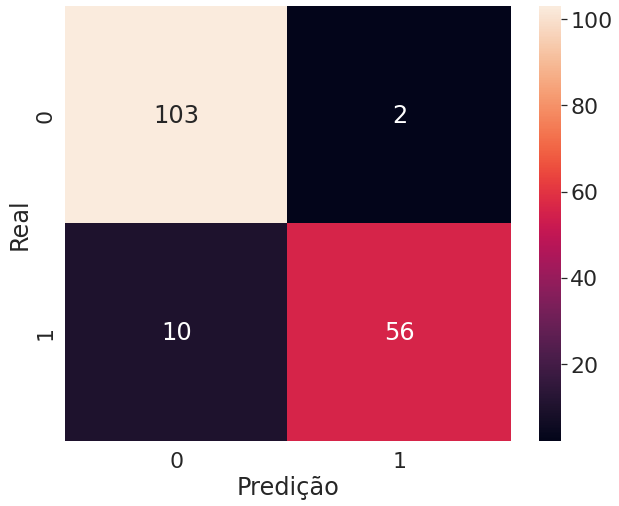

In [48]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, 
                                       random_state = SEED)

classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator=classificador, 
                           cv=5, 
                           step=1, 
                           scoring='accuracy')

selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)



y_pred = classificador.predict(teste_rfecv)
matriz_confusao = confusion_matrix(teste_y, y_pred)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")


print(f'Acurácia: {classificador.score(teste_rfecv, teste_y) * 100 :.2f}%')

Feitas as modificações, poderemos executar o nosso código. Esse é o mais lento dos métodos de classificação utilizados até agora, pois ele gerará um RFE para cada um dos blocos divididos - no nosso caso, 5.

Perceba que temos uma acurácia um pouco maior que as que vínhamos conseguindo até o momento. Analisando a matriz de confusão, veremos que conseguimos melhorar a predição nos casos em que a pessoa tem um câncer benigno. Em comparação com o método RFE, o RFECV também melhorou as predições quando a pessoa tem um câncer maligno, mas ainda possui 1 erro a mais em comparação com o SelectKBest. (nota: nao está batendo exatamente com os valores da aula)

Se executarmos selecionador_rfecv.n_features_, teremos acesso ao número de features utilizado para chegar a esse resultado - nesse caso, 19 (26 no meu caso).

In [49]:
selecionador_rfecv.n_features_

26

Com selecionador_rfecv.support_, teremos como retorno um array mostrando True para todas as features que foram selecionadas. 

In [50]:
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Com treino_x.columns[selecionador_rfecv.support_], conseguiremos comparar esses valores com o nosso conjunto de treino, obtendo como retorno todas as features selecionadas:

In [51]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

Assim, conseguimos determinar quais features mais impactam o nosso modelo. 

Também podemos utilizar o selecionador_rfecv.cv_results_['mean_test_score'] para conseguirmos um score acumulativo para cada uma das features.

In [52]:
selecionador_rfecv.cv_results_['mean_test_score']

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

Mas por que o RFECV escolheu esse número de features? É possível plotarmos um gráfico que nos ajudará a entender essa escolha.

<function matplotlib.pyplot.show>

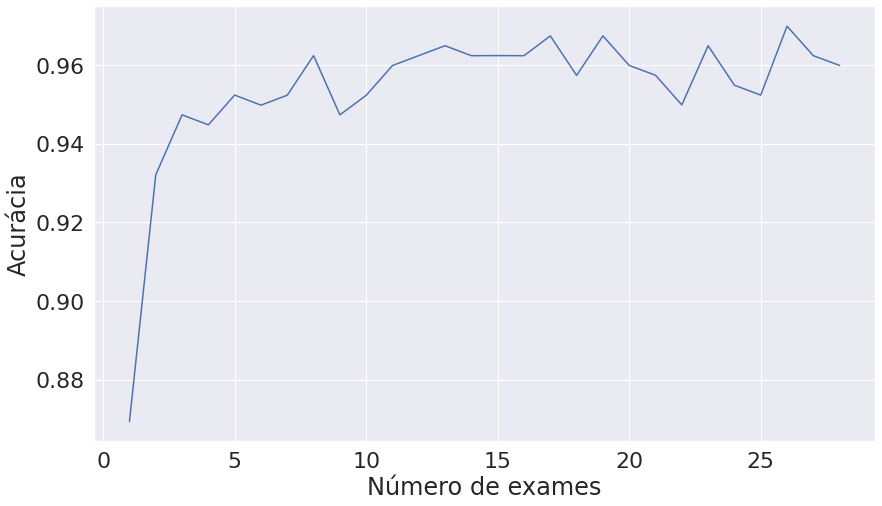

In [53]:
plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), 
         selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

Como é possível verificar no gráfico, 26 é o número de features que nos retorna o maior score.

Todos os métodos que utilizamos até o momento (SelectKBest, RFE e RFECV) selecionaram, como um filtro, algumas features, e por isso são chamados de "métodos de seleção de features" (feature selection methods). Mas será que existe outro tipo de método? Descobriremos no próximo vídeo!

## Visualizando dados no plano

Agora trabalharemos com a seguinte situação: temos o dataset resultados_exames e queremos visualizar cada linha em um plano, de forma parecida com um gráfico de dispersão, para compararmos entre tipos de cânceres malignos e benignos. Para isso, podemos pegar um dos métodos de seleção de features, modificar o número de seleções para 2, resultando em duas dimensões de dados, e plotar os resultados em um plano.

Acurácia: 87.13%


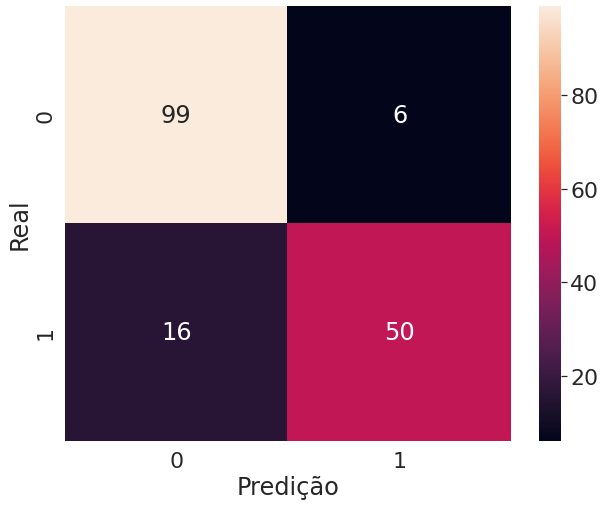

In [54]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = SEED)

classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, 
                       n_features_to_select=2,   # aqui
                       step=1)

selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

y_pred = classificador.predict(teste_rfe)
matriz_confusao = confusion_matrix(teste_y, y_pred)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")

print(f'Acurácia: {classificador.score(teste_rfe, teste_y) * 100 :.2f}%')

Em seguida, usaremos criaremos uma nova variável valores_exames_v7 que receberá o transform() de valores_exames_v6. Em seguida, executaremos valores_exames_v7 para analisarmos o conjunto obtido.

In [55]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

Temos então uma base de dados com 569 itens e apenas duas dimensões, exatamente o que precisamos para gerar o tipo de visualização desejado.

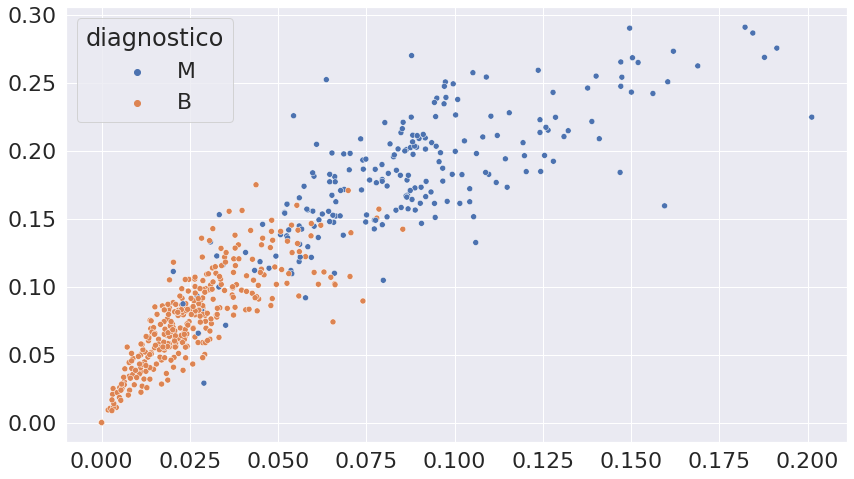

In [56]:
import seaborn as sns 

plt.figure(figsize=(14, 8))

sns.scatterplot(x = valores_exames_v7[:,0],   # array
                y = valores_exames_v7[:,1],   # array
                hue = diagnostico)

Teremos como resultado um gráfico de distribuição no qual cada ponto laranja é um câncer benigno e cada ponto azul é um câncer maligno.

Porém, tendo excluído dimensões até restarem apenas duas, não estamos perdendo muita informação? Na verdade sim. Sendo assim, no caso de visualizações desse tipo, selecionar apenas duas features não é o mais adequado.

Precisaremos encontrar uma maneira de preservar as características que irão diferenciar os tipos de câncer, e é isso que faremos no próximo vídeo.

## PCA e TSNE

### PCA

Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o PCA. O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação.

Vamos aplicar o PCA nos nossos dados e verificar como ficará a visualização, já que a criada com o feature selection não nos pareceu uma ótima solução.

Começaremos importando do sklearn.decomposition a função PCA. Instanciaremos o PCA() em uma variável pca, passando para ele o n_components, que é o número de variáveis que queremos ter como retorno - no caso, 2. Em seguida, usaremos o fit_transform() para transformarmos os dados do conjunto valores_exames_v6, o último tratamento que fizemos sem uma transformação, e armazenaremos em uma variável valores_exames_v8.

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

Tendo obtido esse novo array, plotaremos novamente o gráfico de dispersão, dessa vez utilizando O valores_exames_v8.

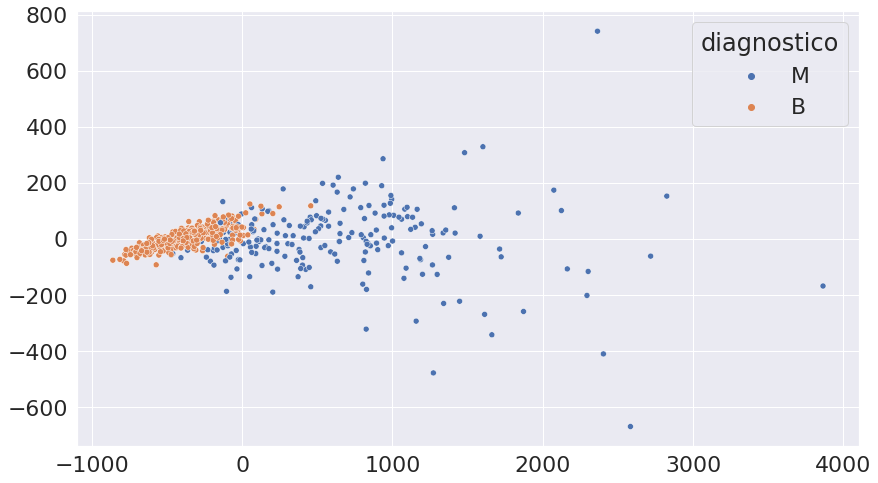

In [58]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x = valores_exames_v8[:,0], 
                y = valores_exames_v8[:,1], 
                hue = diagnostico)

O PCA realizou a transformação, mas ainda não temos uma visualização que pode ser analisada em detalhes.

Isso porque valores_exames_v6 utiliza a nossa base de dados original, sem uma padronização dos valores, e o PCA se comporta melhor com os dados já normalizados.

Sendo assim, ao invés de aplicarmos a transformação em valores_exames_v6, aplicaremos em valores_exames_v5.


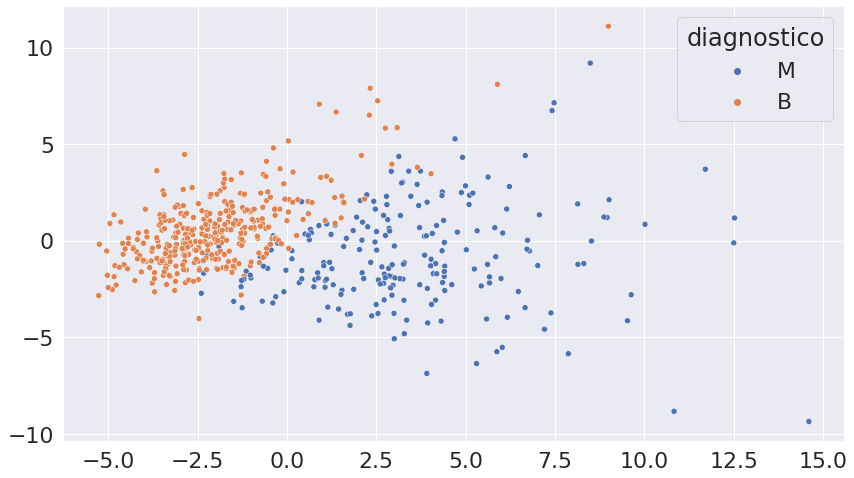

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], 
                y = valores_exames_v8[:,1], 
                hue = diagnostico)

Dessa forma, conseguiremos enxergar de maneira mais clara onde existem pontos com maiores confusões, traçando uma linha que dividirá os cânceres dos tipos maligno ou benigno. 

### t-SNE

Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

Por exemplo, se calcularmos a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

Para implementarmos, importaremos o TSNE do módulo sklearn.manifolds e o instanciaremos da mesma forma que fizemos com o PCA. Em seguida, criaremos uma variável valores_exames_v9 que receberá o fit_transform() do conjunto valores_exames_v5, e plotaremos esse array em um gráfico de dispersão.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


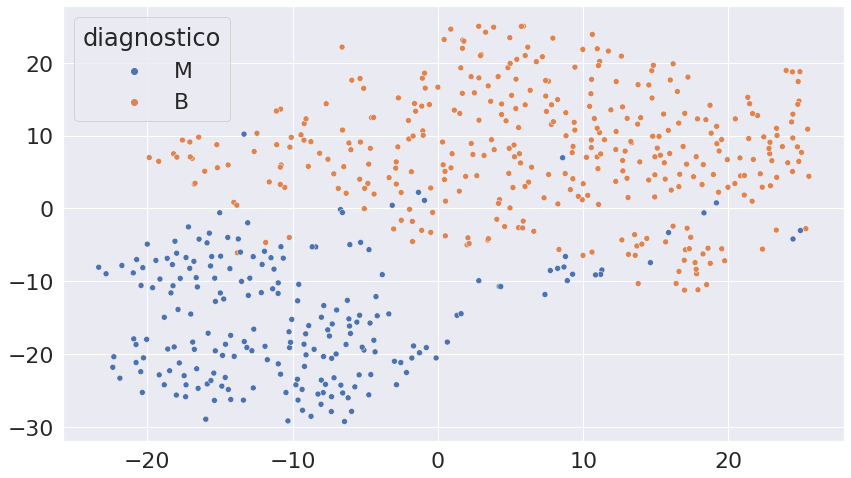

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], 
                y = valores_exames_v9[:,1], 
                hue = diagnostico)

O TSNE é um pouco mais lento que o PCA, e por isso, a depender do tamanho da sua base de dados, resultará em um custo computacional um pouco alto.

Como resultado, teremos uma visualização que separa muito bem os dados no espaço, tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. Assim, é bem mais simples determinar uma fronteira entre tais classificações.

Essas técnicas que realizam uma transformação matemática nos dados antes de processá-los, reduzindo suas dimensões, são chamadas justamente de "redução de dimensionalidade".

A diferença entre a redução de dimensionalidade e a seleção de features é que a segunda funciona como um funil que filtra as principais características de uma base de dados original.